## 네이버 이미지 가져오기

In [ ]:
import requests
import pprint # JSON 출력 이쁘게

# 네이버에서 받은 아이디와 패스워드 할당
client_id = 'LAEicvdD4YoRhK5cXPlR'
client_secret = 'VkMM1WNH5r'

#검색어
query = '강아지'

#네이버 URL
naver_open_api = 'https://openapi.naver.com/v1/search/image'

#요청 변수
params = {'query':query,'display':100}

# 패턴 코드
# HTTP 규약이 있고, 그 중 Header 영역에 네이버 id/pwd 정보를 추가하여 URL 요청
# verify=False : SSLError 발생시 적용. 회사/기관망 사용시 적용
header_params = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}
res = requests.get(naver_open_api, headers=header_params, params=params, verify=False)

#상태코드 200일경우 정상, 그외 에러이므로 프로그램 종료
if res.status_code != 200: 
    print ("Error Code:", res.status_code) 
    exit() #프로그램 종료
     

# 검색 결과
data = res.json()

# 결과 출력
# pprint.pprint(data['items'])


/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openapi.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


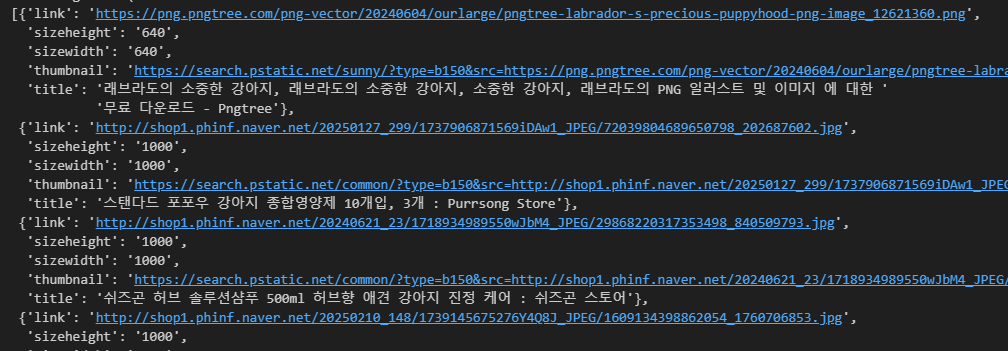

## 이미지 저장하기

In [5]:
from urllib.error import URLError, HTTPError
import urllib.request
import requests
import pprint # JSON 출력 이쁘게

# 네이버에서 받은 아이디와 패스 할당
client_id = 'LAEicvdD4YoRhK5cXPlR'
client_secret = 'VkMM1WNH5r'

#검색어
query = '강아지'

#네이버 URL
naver_open_api = 'https://openapi.naver.com/v1/search/image'

#요청 변수
params = {'query':query,'display':10}

# 패턴 코드
# HTTP 규약이 있고, 그 중 Header 영역에 네이버 id/pwd 정보를 추가하여 URL 요청
header_params = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}
res = requests.get(naver_open_api, headers=header_params, params=params, verify=False)

if res.status_code != 200: 
    print ("Error Code:", res.status_code) 
    exit()
    

# 검색 결과
data = res.json()

# 결과 출력
# pprint.pprint(data['items'])
    
# 데이터 추출
for index, item in enumerate(data['items']):
    try:
#         print (index + 1, item['title'], item['link'])
        fname = f'./image/img_{index + 1}.png'
        urllib.request.urlretrieve(item['link'], fname)

    except HTTPError as e:
        print(e,item['link'])
        pass
    


/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openapi.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


HTTP Error 403: Forbidden https://png.pngtree.com/png-vector/20240604/ourlarge/pngtree-labrador-s-precious-puppyhood-png-image_12621360.png


## 파일이름 수정하기

- 디렉토리에 파일리스트 가져오기
- 파일이름(문자열) 바꾸기 img_1.jpg -> 강아지_1.jpg
- 수정된 이름으로 파일 이름에 적용하기

In [6]:
#디렉토리에 파일리스트 가져오기

import os
path_dir='./image'
fileList=os.listdir(path_dir)
fileList

['img_5.png',
 'img_10.png',
 'img_3.png',
 'img_2.png',
 'img_8.png',
 'img_6.png',
 'img_9.png',
 'img_4.png',
 'img_7.png']

In [7]:
#파일이름(문자열) 바꾸기 img_1.jpg -> 강아지_1.jpg

fname = 'img_1.jpg'
fname = fname.replace('img','강아지')
fname

'강아지_1.jpg'

In [8]:
#모든 파일이름 바꾸기
#1.디렉토리에서 파일리스트 가져오기
#2.파일 하나씩 이름 바꾸기

for fname in fileList:

    new_file = fname.replace('img','강아지')
#     print(new_file)
    os.rename(path_dir+"/"+fname, path_dir+"/"+new_file) 

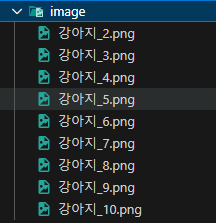